In [5]:
!pip install xlrd

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Using cached https://files.pythonhosted.org/packages/b0/16/63576a1a001752e34bf8ea62e367997530dc553b689356b9879339cf45a4/xlrd-1.2.0-py2.py3-none-any.whl


In [134]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import maup
import numpy as np 

In [135]:
precinct_path='../pres16_tab/NorthDakota_Precincts2016.xlsx'
precinct_data= pd.read_excel(precinct_path)

In [136]:
precinct_data.columns

Index(['year', 'stage', 'special', 'state', 'state_postal', 'state_fips',
       'state_icpsr', 'county_name', 'county_fips', 'county_ansi',
       'county_lat', 'county_long', 'jurisdiction', 'precinct', 'candidate',
       'candidate_normalized', 'office', 'district', 'writein', 'party',
       'mode', 'votes', 'candidate_opensecrets', 'candidate_wikidata',
       'candidate_party', 'candidate_last', 'candidate_first',
       'candidate_middle', 'candidate_full', 'candidate_suffix',
       'candidate_nickname', 'candidate_fec', 'candidate_fec_name',
       'candidate_google', 'candidate_govtrack', 'candidate_icpsr',
       'candidate_maplight'],
      dtype='object')

In [137]:
barnes = precinct_data[7:111]
barnes.head()

,year,stage,special,state,state_postal,state_fips,state_icpsr,county_name,county_fips,county_ansi,...,candidate_middle,candidate_full,candidate_suffix,candidate_nickname,candidate_fec,candidate_fec_name,candidate_google,candidate_govtrack,candidate_icpsr,candidate_maplight
7,2016,gen,False,North Dakota,ND,38,36,Barnes County,38003,1034225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016,gen,False,North Dakota,ND,38,36,Barnes County,38003,1034225,...,NaN,NaN,NaN,NaN,P60021102,"CASTLE, DARRELL LANE",NaN,NaN,NaN,NaN
9,2016,gen,False,North Dakota,ND,38,36,Barnes County,38003,1034225,...,NaN,NaN,NaN,NaN,P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",NaN,NaN,NaN,NaN
10,2016,gen,False,North Dakota,ND,38,36,Barnes County,38003,1034225,...,NaN,NaN,NaN,NaN,P60016342,"DE LA FUENTE, ROQUE ROCKY",NaN,NaN,NaN,NaN
11,2016,gen,False,North Dakota,ND,38,36,Barnes County,38003,1034225,...,NaN,NaN,NaN,NaN,P60012234,"JOHNSON, JOHN FITZGERALD MR.",NaN,NaN,NaN,NaN


In [138]:
barnes_precinct = pd.pivot_table(barnes, index=['precinct'], columns=['office','party'], values=['votes'], aggfunc = np.sum)
barnes_precinct.columns
#CAN ADD CANDIDATE 

MultiIndex(levels=[['votes'], ['US President'], ['american delta', 'constitution', 'democratic', 'green', 'libertarian', 'republican']],
           codes=[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5]],
           names=[None, 'office', 'party'])

In [139]:
barnes_precinct.columns = barnes_precinct.columns.to_series().str.join('')

In [140]:
barnes_precinct.columns

Index(['votesUS Presidentamerican delta', 'votesUS Presidentconstitution',
       'votesUS Presidentdemocratic', 'votesUS Presidentgreen',
       'votesUS Presidentlibertarian', 'votesUS Presidentrepublican'],
      dtype='object')

In [141]:
barnes_precinct = barnes_precinct.drop(
     columns=['votesUS Presidentamerican delta', 'votesUS Presidentconstitution',\
              'votesUS Presidentgreen'])

In [142]:
index_dict = {
    'Precinct 2401-00'
}
col_dict= {
    'votesUS Presidentdemocratic' : 'PRES16D', 
    'votesUS Presidentlibertarian': 'PRES16L',
    'votesUS Presidentrepublican':  'PRES16R'
}
barnes_precinct = barnes_precinct.rename_axis('PRECINCT')
barnes_precinct = barnes_precinct.rename(columns=col_dict)
barnes_precinct.head()
#barnes_precinct.to_csv(precinct_path.rsplit('.',1)[0] + '_barnes.csv')

,PRES16D,PRES16L,PRES16R
PRECINCT,,,
Precinct 2401-00,141.0,29.0,240.0
Precinct 2402-00,233.0,53.0,NaN
Precinct 2403-00,164.0,40.0,230.0
Precinct 2404-00,205.0,51.0,347.0
Precinct 2405-00,289.0,66.0,451.0


In [58]:
#join by precinct name 
barnes_shp = './barnes/shp/barnes_precincts.shp'
barnes_gdf = gpd.read_file(barnes_shp)
barnes_gdf.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PRECINCT,geometry
0,38,003,968000,3055,380039680003055,Block 3055,G5040,R,None,None,S,0,774492,+46.9006185,-098.1476383,Precinct 2411-00,"POLYGON ((581244.812 5194690.487, 581244.445 5..."
1,38,003,968300,1008,380039683001008,Block 1008,G5040,U,90055,C,S,16436,0,+46.9385876,-097.9951834,Precinct 2401-00,"POLYGON ((576359.510 5198882.689, 576374.126 5..."
2,38,003,968300,2011,380039683002011,Block 2011,G5040,U,90055,C,S,129204,0,+46.9266554,-097.9924004,Precinct 2402-00,"POLYGON ((576000.092 5197629.977, 575996.477 5..."
3,38,003,968200,1010,380039682001010,Block 1010,G5040,U,90055,C,S,12764,0,+46.9226442,-098.0111948,Precinct 2403-00,"POLYGON ((575223.557 5197091.331, 575248.252 5..."
4,38,003,968300,3025,380039683003025,Block 3025,G5040,U,90055,C,S,13378,0,+46.9246130,-098.0098028,Precinct 2404-00,"POLYGON ((574003.137 5196356.668, 574032.888 5..."


In [143]:
merged = pd.merge(barnes_gdf, barnes_precinct, 
                  left_on="PRECINCT", right_on="PRECINCT")
merged.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PRECINCT,geometry,PRES16D,PRES16L,PRES16R
0,38,003,968000,3055,380039680003055,Block 3055,G5040,R,None,None,S,0,774492,+46.9006185,-098.1476383,Precinct 2411-00,"POLYGON ((581244.812 5194690.487, 581244.445 5...",144.0,39.0,380.0
1,38,003,968300,1008,380039683001008,Block 1008,G5040,U,90055,C,S,16436,0,+46.9385876,-097.9951834,Precinct 2401-00,"POLYGON ((576359.510 5198882.689, 576374.126 5...",141.0,29.0,240.0
2,38,003,968300,2011,380039683002011,Block 2011,G5040,U,90055,C,S,129204,0,+46.9266554,-097.9924004,Precinct 2402-00,"POLYGON ((576000.092 5197629.977, 575996.477 5...",233.0,53.0,NaN
3,38,003,968200,1010,380039682001010,Block 1010,G5040,U,90055,C,S,12764,0,+46.9226442,-098.0111948,Precinct 2403-00,"POLYGON ((575223.557 5197091.331, 575248.252 5...",164.0,40.0,230.0
4,38,003,968300,3025,380039683003025,Block 3025,G5040,U,90055,C,S,13378,0,+46.9246130,-098.0098028,Precinct 2404-00,"POLYGON ((574003.137 5196356.668, 574032.888 5...",205.0,51.0,347.0


In [144]:
outpath = './barnes/joined/barnes_precincts_joinedPRES16.shp'
merged.to_file(outpath)

In [36]:
# Cleaning Census Blocks Data

In [147]:
# Blocks Shapefile
blocks_shp_path = '../nhgis_blocks_shp/ND_block_2010.shp'
blocks_shp = gpd.read_file(blocks_shp_path)
blocks_shp.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GISJOIN,Shape_Area,Shape_len,geometry
0,38,001,965600,2007,380019656002007,Block 2007,G5040,None,None,S,2590246.0,0.0,+46.1981834,-102.1126296,G38000109656002007,2.590238e+06,6465.345376,"POLYGON ((-471612.431 988042.665, -471591.032 ..."
1,38,001,965600,1010,380019656001010,Block 1010,G5040,None,None,S,346615.0,0.0,+46.0640454,-102.7925289,G38000109656001010,3.466150e+05,3088.932163,"POLYGON ((-526018.033 976456.750, -525814.102 ..."
2,38,001,965600,1326,380019656001326,Block 1326,G5040,None,None,S,12387.0,0.0,+46.0634318,-102.7902612,G38000109656001326,1.238674e+04,439.242921,"POLYGON ((-525734.741 975957.733, -525743.798 ..."
3,38,001,965600,1332,380019656001332,Block 1332,G5040,None,None,S,18580.0,0.0,+46.0624533,-102.7869039,G38000109656001332,1.857941e+04,558.157603,"POLYGON ((-525453.511 975826.911, -525456.151 ..."
4,38,001,965600,2483,380019656002483,Block 2483,G5040,None,None,S,4248685.0,0.0,+46.0821376,-102.8021921,G38000109656002483,4.248685e+06,9830.499574,"POLYGON ((-525414.392 978824.605, -525432.884 ..."


In [148]:
# Blocks Tabular Data
blocks_path = '../nhgis_blocks/nhgis0003_ds172_2010_block.csv'
blocks_data = pd.read_csv(blocks_path)
blocks_data.head()

,GISJOIN,YEAR,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,PLACEA,...,H75064,H75065,H75066,H75067,H75068,H75069,H75070,H75071,H75072,H75073
0,G38000109656001000,2010,2,4,North Dakota,38,Adams County,1,13270,99999,...,0,0,0,0,0,0,0,0,0,0
1,G38000109656001001,2010,2,4,North Dakota,38,Adams County,1,13270,99999,...,0,0,0,0,0,0,0,0,0,0
2,G38000109656001002,2010,2,4,North Dakota,38,Adams County,1,13270,99999,...,0,0,0,0,0,0,0,0,0,0
3,G38000109656001003,2010,2,4,North Dakota,38,Adams County,1,10340,99999,...,0,0,0,0,0,0,0,0,0,0
4,G38000109656001004,2010,2,4,North Dakota,38,Adams County,1,10340,99999,...,0,0,0,0,0,0,0,0,0,0


In [151]:
blocks_joined = pd.merge(blocks_shp, blocks_data, 
                         left_on='GISJOIN', right_on='GISJOIN')
blocks_joined.head()
blocks_joined['geometry']

0         POLYGON ((-471612.431 988042.665, -471591.032 ...
1         POLYGON ((-526018.033 976456.750, -525814.102 ...
2         POLYGON ((-525734.741 975957.733, -525743.798 ...
3         POLYGON ((-525453.511 975826.911, -525456.151 ...
4         POLYGON ((-525414.392 978824.605, -525432.884 ...
5         POLYGON ((-522422.397 975385.001, -522423.963 ...
6         POLYGON ((-523916.907 977103.385, -523957.733 ...
7         POLYGON ((-530243.398 979176.278, -530306.231 ...
8         POLYGON ((-524256.634 972291.546, -524466.045 ...
9         POLYGON ((-524666.480 975545.588, -524674.189 ...
10        POLYGON ((-519260.258 996110.068, -519150.144 ...
11        POLYGON ((-518593.380 996062.497, -518593.524 ...
12        POLYGON ((-520101.050 997783.655, -520101.023 ...
13        POLYGON ((-514503.873 996649.531, -514510.466 ...
14        POLYGON ((-511341.758 997150.803, -511460.527 ...
15        POLYGON ((-513463.309 999410.283, -513420.913 ...
16        POLYGON ((-511460.527 997161.4

In [192]:
blocks_df = blocks_joined[1348:4281]

# H7Z001 TOTPOP: Total population
# H7Z003 NH_WHITE: White, non-Hispanic alone population
# H7Z004 NH_BLACK: Black, non-Hispanic alone population
# H7Z005 NH_AMIN: American Indian and Alaska Native, non-Hispanic alone population
# H7Z006 NH_ASIAN: Asian, non-Hispanic alone population
# H7Z007 NH_NHPI: Native Hawaiian and Pacific Islander, non-Hispanic alone population
# H7Z008 NH_OTHER: Other race, non-Hispanic alone population
# H7Z009 NH_2MORE: Non-Hispanic population of two or more races
# H7Z010 HISP: Total Hispanic/Latino population
# H7Z011 H_WHITE: White, Hispanic alone population
# H7Z012 H_BLACK: Black, Hispanic alone population
# H7Z013 H_AMIN: American Indian and Alaska Native, Hispanic alone population
# H7Z014 H_ASIAN: Asian, Hispanic alone population
# H7Z015 H_NHPI: Native Hawaiian and Pacific Islander, Hispanic alone population
# H7Z016 H_OTHER: Other race, Hispanic alone population
# H7Z017 H_2MORE: Hispanic population of two or more races
# H75001 VAP: Total voting age population
# H75002 HVAP: Hispanic voting age population
# H75005 WVAP: White, non-Hispanic voting age population
# H75006 BVAP: Black, non-Hispanic voting age population
# H75007 AMINVAP: American Indian and Alaska Native, non-Hispanic voting age population
# H75008 ASIANVAP: Asian, non-Hispanic voting age population
# H75009 NHPIVAP: Native Hawaiian and Pacific Islander, non-Hispanic voting age population
# H75010 OTHERVAP: Other race, non-Hispanic voting age population
# H75011 2MOREVAP: Voting age population of two or more races

nhgis_cols = {
 'H7Z001' : 'TOTPOP',
 'H7Z003' : 'NH_WHITE',
 'H7Z004' : 'NH_BLACK',
 'H7Z005' : 'NH_AMIN',
 'H7Z006' : 'NH_ASIAN',
 'H7Z007' : 'NH_NHPI',
 'H7Z008' : 'NH_OTHER',
 'H7Z009' : 'NH_2MORE',
 'H7Z010' : 'HISP',
 'H7Z011' : 'H_WHITE',
 'H7Z012' : 'H_BLACK',
 'H7Z013' : 'H_AMIN',
 'H7Z014' : 'H_ASIAN',
 'H7Z015' : 'H_NHPI',
 'H7Z016' : 'H_OTHER',
 'H7Z017' : 'H_2MORE',
 'H75001' : 'VAP',
 'H75002' : 'HVAP',
 'H75005' : 'WVAP',
 'H75006' : 'BVAP',
 'H75007' : 'AMINVAP',
 'H75008' : 'ASIANVAP',
 'H75009' : 'NHPIVAP',
 'H75010' : 'OTHERVAP',
 'H75011' : '2MOREVAP'
}

nhgis_codes = ['COUNTY']
for key in nhgis_cols:
    nhgis_codes.append(key)

blocks_df = blocks_df[nhgis_codes]
blocks_df = blocks_df.rename(columns=nhgis_cols)

blocks_gdf = gpd.GeoDataFrame(blocks_df, crs='epsg:26914', geometry=blocks_joined['geometry'])
blocks_gdf.head()

,COUNTY,TOTPOP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,HISP,...,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,geometry
1348,Barnes County,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-159754.103 1029821.514, -159761.276..."
1349,Barnes County,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-161023.694 1028245.375, -160990.909..."
1350,Barnes County,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-161418.298 1027579.678, -161419.431..."
1351,Barnes County,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-166903.822 1025182.790, -166945.667..."
1352,Barnes County,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-136881.919 1044071.713, -136884.965..."


In [80]:
# MAUP

In [202]:
blocks_gdf['geometry'] = blocks_gdf.buffer(0)
blocks_gdf = blocks_gdf.to_crs('epsg:26914')
barnes_gdf = barnes_gdf.to_crs(blocks_gdf.crs)

In [203]:
assignment = maup.assign(blocks_gdf, barnes_gdf)

/usr/local/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/usr/local/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can 

In [207]:
variables = ['TOTPOP', 'NH_WHITE',
       'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER', 'NH_2MORE',
       'HISP', 'H_WHITE', 'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER',
       'H_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP',
       'NHPIVAP', 'OTHERVAP', '2MOREVAP']
barnes_gdf[variables] = blocks_gdf[variables].groupby(assignment).sum()
barnes_gdf.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,...,H_2MORE,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP
0,38,003,968000,3055,380039680003055,Block 3055,G5040,R,None,None,...,0,752,0,742,1,6,0,0,0,3
1,38,003,968300,1008,380039683001008,Block 1008,G5040,U,90055,C,...,3,540,4,507,8,2,11,0,0,8
2,38,003,968300,2011,380039683002011,Block 2011,G5040,U,90055,C,...,9,1294,16,1235,10,7,10,0,0,16
3,38,003,968200,1010,380039682001010,Block 1010,G5040,U,90055,C,...,5,1055,15,972,37,9,7,1,0,14
4,38,003,968300,3025,380039683003025,Block 3025,G5040,U,90055,C,...,2,1164,10,1120,5,10,9,0,0,10


In [210]:
precinct_demo_outpath = './barnes/demographics/barnes_demographics_joined.shp'
barnes_gdf.to_file(precinct_demo_outpath)

In [215]:
# Sanity Check
print("TOTAL VAP using blocks:", blocks_gdf['VAP'].sum())
print("TOTAL VAP using barnes:", barnes_gdf['VAP'].sum())

TOTAL VAP using blocks: 8784
TOTAL VAP using barnes: 8784


In [216]:
# Assigning Demographics Data to Precincts

In [217]:
districts_inpath = './barnes/demographics/barnes_demographics_joined.shp'
districts = gpd.read_file(districts_inpath)

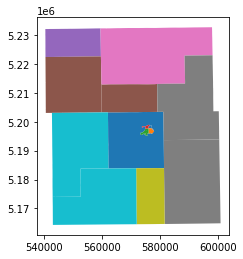

In [218]:
districts.plot(cmap='tab10')

In [219]:
districts.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,...,VAP,HVAP,WVAP,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,geometry
0,38,003,968000,3055,380039680003055,Block 3055,G5040,R,None,None,...,752,0,742,1,6,0,0,0,3,"POLYGON ((581244.812 5194690.487, 581244.445 5..."
1,38,003,968300,1008,380039683001008,Block 1008,G5040,U,90055,C,...,540,4,507,8,2,11,0,0,8,"POLYGON ((576359.510 5198882.689, 576374.126 5..."
2,38,003,968300,2011,380039683002011,Block 2011,G5040,U,90055,C,...,1294,16,1235,10,7,10,0,0,16,"POLYGON ((576000.092 5197629.977, 575996.477 5..."
3,38,003,968200,1010,380039682001010,Block 1010,G5040,U,90055,C,...,1055,15,972,37,9,7,1,0,14,"POLYGON ((575223.557 5197091.331, 575248.252 5..."
4,38,003,968300,3025,380039683003025,Block 3025,G5040,U,90055,C,...,1164,10,1120,5,10,9,0,0,10,"POLYGON ((574003.137 5196356.668, 574032.888 5..."


In [225]:
districts = districts.to_crs(blocks_gdf.crs)
districts = districts.set_index('PRECINCT')

In [226]:
assignment = maup.assign(blocks_gdf, districts) 

/usr/local/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return intersections[-(intersections.is_empty | intersections.isna())]
/usr/local/lib/python3.7/site-packages/maup/indexed_geometries.py:27: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can 

In [227]:
blocks_gdf['PRECINCT'] = assignment

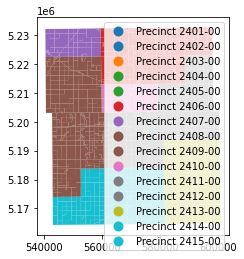

In [229]:
blocks_gdf.plot(column='PRECINCT', legend=True)

In [232]:
district_demographics = blocks_gdf.groupby('PRECINCT').sum()[['VAP', 'BVAP','HVAP']]
district_demographics.head()

,VAP,BVAP,HVAP
PRECINCT,,,
Precinct 2401-00,540,8,4
Precinct 2402-00,1294,10,16
Precinct 2403-00,1055,37,15
Precinct 2404-00,1164,5,10
Precinct 2405-00,1301,2,13


In [235]:
blocks_precinct_output = './barnes/barnes_county/barnes_county.shp'
blocks_gdf.to_file(blocks_precinct_output)